# Task 1

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_excel('AirQualityUCI.xlsx')

# Print dataset description
print("Dataset Shape:", df.shape,"\n")
print(f"Number of instances: {df.shape[0]}\n")
print (f"Number of Features: {df.shape[1]}\n")
print("Features:", df.columns.tolist(),"\n")
print("First Few Rows:\n")
print(df.head())


Dataset Shape: (9357, 15) 

Number of instances: 9357

Number of Features: 15

Features: ['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH'] 

First Few Rows:

        Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)   C6H6(GT)  \
0 2004-03-10  18:00:00     2.6      1360.00       150  11.881723   
1 2004-03-10  19:00:00     2.0      1292.25       112   9.397165   
2 2004-03-10  20:00:00     2.2      1402.00        88   8.997817   
3 2004-03-10  21:00:00     2.2      1375.50        80   9.228796   
4 2004-03-10  22:00:00     1.6      1272.25        51   6.518224   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0        1045.50    166.0       1056.25    113.0       1692.00      1267.50   
1         954.75    103.0       1173.75     92.0       1558.75       972.25   
2         939.25    131.0       1140.00    114.0       1554.50      1074.00  

# Task 2


In [2]:
# Drop 'Date' and 'Time' columns as they are unique ID columns for correlation analysis
df_numeric = df.drop(columns=['Date', 'Time'])

# Compute the correlation matrix
correlation_matrix = df_numeric.corr().abs()

# For each attribute, sum the absolute correlations with all other attributes
# Subtract 1 from the diagonal (correlation of the attribute with itself)A
sum_of_correlations = correlation_matrix.sum() - 1

# Find the attribute with the highest sum of correlations
most_influential_attribute = sum_of_correlations.idxmax()
max_sum_of_correlations = sum_of_correlations.max()

# Print the most important attribute
print(f"The most important attribute based on correlation with all others is '{most_influential_attribute}' with a total correlation sum of {max_sum_of_correlations:.2f}")


The most important attribute based on correlation with all others is 'PT08.S1(CO)' with a total correlation sum of 6.52


Mean of PT08.S1(CO): 1048.87
Median of PT08.S1(CO): 1052.50
Mode of PT08.S1(CO): -200.00
Standard Deviation of PT08.S1(CO): 329.82
Variance of PT08.S1(CO): 108779.26
Min of PT08.S1(CO): -200.00
Max of PT08.S1(CO): 2039.75
Range of PT08.S1(CO): 2239.75



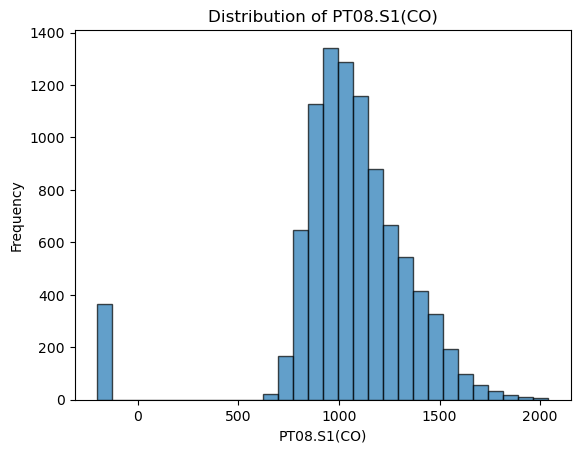

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_excel('AirQualityUCI.xlsx')

# Select a numerical attribute for analysis
attribute = 'PT08.S1(CO)'

# Compute measures of central tendency and dispersion
mean_value = df[attribute].mean()
median_value = df[attribute].median()
mode_value = df[attribute].mode()[0]
std_dev = df[attribute].std()
variance = df[attribute].var()
min_value = df[attribute].min()
max_value = df[attribute].max()
range_value = max_value - min_value

# Print results
print(f"Mean of {attribute}: {mean_value:.2f}")
print(f"Median of {attribute}: {median_value:.2f}")
print(f"Mode of {attribute}: {mode_value:.2f}")
print(f"Standard Deviation of {attribute}: {std_dev:.2f}")
print(f"Variance of {attribute}: {variance:.2f}")
print(f"Min of {attribute}: {min_value:.2f}")
print(f"Max of {attribute}: {max_value:.2f}")
print(f"Range of {attribute}: {range_value:.2f}\n")

# Visualization

plt.hist(df[attribute].dropna(), bins=30, edgecolor='k', alpha=0.7)
plt.title(f'Distribution of {attribute}')
plt.xlabel(attribute)
plt.ylabel('Frequency')
plt.savefig('histogram.png')
plt.show()

In [4]:
# Print no. of missing values
missing_count = ((df[attribute] == -200)).sum()
print(f"Number of missing values (including -200): {missing_count}")

Number of missing values (including -200): 366


In [5]:
# Replace -200 values with NaN so we can handle them consistently as missing values
df[attribute] = df[attribute].replace(-200, pd.NA)

# Compute the median value for the attribute
median_value = df[attribute].median()

# Fill missing values (both NaN and previously -200) with the median
df[attribute] = df[attribute].fillna(median_value).infer_objects(copy=False)

# Verify if missing values are handled
print(df[attribute].isnull().sum())  # Should print 0 if all missing values are filled


0


C:\Users\ASUS\AppData\Local\Temp\ipykernel_5856\2424072556.py:8: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[attribute] = df[attribute].fillna(median_value).infer_objects(copy=False)


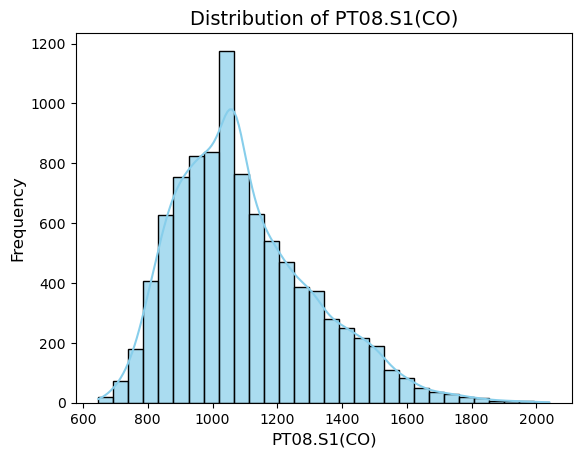

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seaborn histogram (with KDE curve)
sns.histplot(df[attribute].dropna(), bins=30, kde=True, color='skyblue', edgecolor='black', alpha=0.7)

# Adding labels and title
plt.title(f'Distribution of {attribute}', fontsize=14)
plt.xlabel(attribute, fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Saving and displaying the plot
plt.savefig('sns_histogram_after_handling_missing_values.png')
plt.show()


In [7]:
import numpy as np
import pandas as pd

# Replace -200 values with NaN and fill missing values with median
df[attribute] = df[attribute].replace(-200, pd.NA)
median_value = df[attribute].median()
df[attribute] = df[attribute].fillna(median_value)

# Central tendency
mean_value = df[attribute].mean()
median_value = df[attribute].median()
mode_value = df[attribute].mode().values[0]  # Mode might return multiple values, taking the first

# Measures of dispersion
std_deviation = df[attribute].std()  # Standard deviation
variance_value = df[attribute].var()  # Variance
range_value = df[attribute].max() - df[attribute].min()  # Range
iqr_value = np.percentile(df[attribute], 75) - np.percentile(df[attribute], 25)  # Interquartile range

# Output results
print(f"Mean: {mean_value}")
print(f"Median: {median_value}")
print(f"Mode: {mode_value}")
print(f"Standard Deviation: {std_deviation}")
print(f"Variance: {variance_value}")
print(f"Range: {range_value}")
print(f"IQR (Interquartile Range): {iqr_value}")


Mean: 1098.27202450928
Median: 1063.0
Mode: 1063.0
Standard Deviation: 212.91509327233845
Variance: 45332.83694316858
Range: 1392.5
IQR (Interquartile Range): 280.0


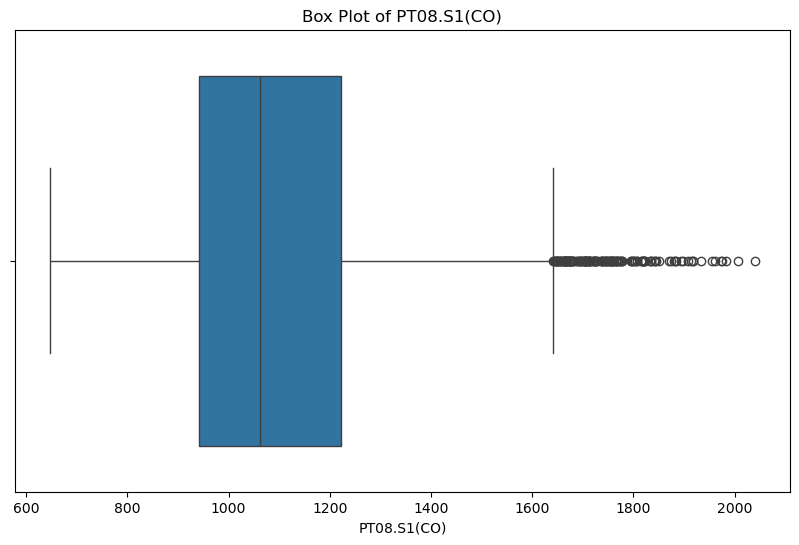

Number of outliers: 72


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Attribute to analyze
attribute = 'PT08.S1(CO)'

# Box plot to identify outliers
plt.figure(figsize=(10, 6))  # Optional: Set figure size for better visibility
sns.boxplot(x=df[attribute])
plt.title('Box Plot of ' + attribute)

# Save the plot as an image file (e.g., PNG)
plt.savefig('boxplot_' + attribute + '.png', format='png', dpi=300)

# Show the plot
plt.show()

# Z-score to identify outliers
z_scores = stats.zscore(df[attribute].dropna())
outliers = df[attribute][abs(z_scores) > 3]
print("Number of outliers:", outliers.shape[0])


# Task 3

In [9]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
df = pd.read_excel('AirQualityUCI.xlsx')

# Select an attribute for normalization
attribute = 'PT08.S1(CO)'

# Replace erroneous values (-200) with NaN for proper missing value handling
df[attribute] = df[attribute].replace(-200, pd.NA)

# Fill missing values in the selected attribute with its median
median_value = df[attribute].median()
df[attribute] = df[attribute].fillna(median_value)

# Normalize the attribute
scaler = MinMaxScaler()
df[attribute + '_normalized'] = scaler.fit_transform(df[[attribute]])

# Print results
print(f"Normalized values of {attribute}:")
print(df[[attribute, attribute + '_normalized']].head())


Normalized values of PT08.S1(CO):
   PT08.S1(CO)  PT08.S1(CO)_normalized
0      1360.00                0.511849
1      1292.25                0.463196
2      1402.00                0.542011
3      1375.50                0.522980
4      1272.25                0.448833


C:\Users\ASUS\AppData\Local\Temp\ipykernel_5856\1415268321.py:15: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[attribute] = df[attribute].fillna(median_value)


# Task 4

In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity

# Load and preprocess your dataset
df = pd.read_excel('AirQualityUCI.xlsx')

# Replace -200 with NaN
df.replace(-200, np.nan, inplace=True)

# Separate numeric and non-numeric columns
numeric_df = df.select_dtypes(include=[np.number])
non_numeric_df = df.select_dtypes(exclude=[np.number])

# Compute medians for numeric columns and fill missing values
df[numeric_df.columns] = numeric_df.fillna(numeric_df.median())

# Reset index and sample 20 data objects
df.reset_index(drop=True, inplace=True)
sampled_df = df.sample(n=20, random_state=1)

# Extract numeric features for similarity calculation
features = sampled_df.select_dtypes(include=[np.number])

# Standardize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Compute Cosine Similarity
cosine_sim = cosine_similarity(scaled_features)

def print_pairwise_similarities(similarity_matrix):
    num_samples = similarity_matrix.shape[0]
    for i in range(num_samples):
        for j in range(i + 1, num_samples):
            print(f"Pair ({i}, {j}): Similarity Score = {similarity_matrix[i, j]}")

# Print all pairwise similarity scores
print("Pairwise Similarity Scores:")
print_pairwise_similarities(cosine_sim)

def get_max_similarity_pair(similarity_matrix):
    np.fill_diagonal(similarity_matrix, 0)  # Set diagonal to 0 to avoid self-similarity
    max_similarity_idx = np.unravel_index(np.argmax(similarity_matrix, axis=None), similarity_matrix.shape)
    return max_similarity_idx

def print_pair_info(df, idx, measure_name):
    # Extract numeric columns for displaying pairs
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    pair_1 = df.iloc[idx[0]][numeric_columns]
    pair_2 = df.iloc[idx[1]][numeric_columns]
    
    print(f"\n{measure_name} Similarity:")
    print(f"Pair with maximum similarity (Index {idx[0]} and {idx[1]}):")
    print(f"Pair 1:\n{pair_1}\n")
    print(f"Pair 2:\n{pair_2}\n")

# Get the pair with maximum similarity
cosine_max_idx = get_max_similarity_pair(cosine_sim)
print_pair_info(sampled_df, cosine_max_idx, 'Cosine Similarity')


Pairwise Similarity Scores:
Pair (0, 1): Similarity Score = 0.4121292782230053
Pair (0, 2): Similarity Score = 0.9681097808682699
Pair (0, 3): Similarity Score = -0.5450987495301508
Pair (0, 4): Similarity Score = 0.231928918784734
Pair (0, 5): Similarity Score = 0.4078825110923374
Pair (0, 6): Similarity Score = -0.32567853650705086
Pair (0, 7): Similarity Score = -0.6119050477222338
Pair (0, 8): Similarity Score = 0.3933125989986351
Pair (0, 9): Similarity Score = -0.346061334591085
Pair (0, 10): Similarity Score = -0.5526115379669827
Pair (0, 11): Similarity Score = -0.24117828778813988
Pair (0, 12): Similarity Score = 0.06945698496331038
Pair (0, 13): Similarity Score = 0.1373572027329303
Pair (0, 14): Similarity Score = -0.5234065091161466
Pair (0, 15): Similarity Score = 0.06231054340282221
Pair (0, 16): Similarity Score = -0.5331376734855943
Pair (0, 17): Similarity Score = 0.1727644161912974
Pair (0, 18): Similarity Score = -0.43943158302240126
Pair (0, 19): Similarity Score = 

# Task 5